<a href="https://colab.research.google.com/github/Herberttdfm/FIAP/blob/main/API_NASA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Seja bem vindo!
Escolha um rover que deseja pesquisar 
 Digite: 1-para (Curiosity) 
 Digite: 2-para (Opportunity) 
 Digite: 3-para (Spirit) 
3
Câmeras disponíveis para cada rover:
-----------------------------------
Curiosity:
- FHAZ
- RHAZ
- MAST
- CHEMCAM
- MAHLI
- MARDI
- NAVCAM

Opportunity:
- FHAZ
- RHAZ
- NAVCAM
- PANCAM
- MINITES

Spirit:
- FHAZ
- RHAZ
- NAVCAM
- PANCAM
- MINITES
-----------------------------------
Qual câmera deseja pesquisar: 
 1- FHAZ 
 2- RHAZ 
 3- MAST 
 4- CHEMCAM 
 5- MAHLI 
 6- MARDI 
 7- NAVCAM 
 8- PANCAM 
 9- MINITES 
9
A câmera MINITES está disponível no rover spirit.
Quantas fotos tem em cada ano:
Ano 2004, temos 110 fotos.
Ano 2005, temos 73 fotos.
Ano 2006, temos 45 fotos.
Ano 2007, temos 53 fotos.
Ano 2008, temos 9 fotos.
Ano 2009, temos 48 fotos.
Ano 2010, temos 8 fotos.
Escolha um ano: 2004
Quantas fotos tem em cada mes:
Mes 01, temos 4 fotos.
Mes 02, temos 17 fotos.
Mes 03, temos 19 fotos.
Mes 04, temos 7 fotos.
Mes 05, temos 6 fotos.
Mes 06, 

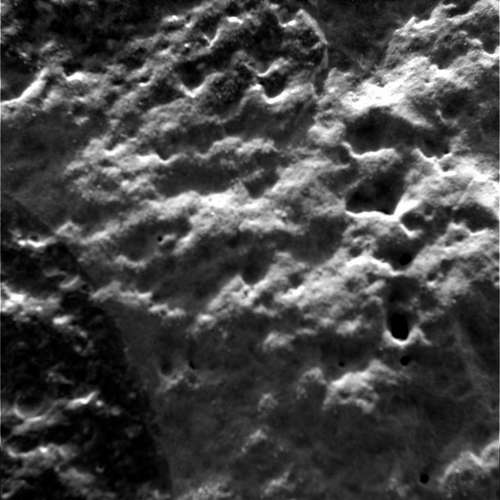

In [ ]:
import requests

print("Seja bem vindo!")

api_key = "gQVsuaa7zICrbbx8XC1l881pK9gzNSMPId0wtBt1"
parametros = {
    'api_key': api_key
}

rover = input("Escolha um rover que deseja pesquisar \n Digite: 1-para (Curiosity) \n Digite: 2-para (Opportunity) \n Digite: 3-para (Spirit) \n")

while rover != "1" and rover != "2" and rover != "3":
    rover = input("Opção inválida, escolha um rover que deseja pesquisar \n Digite: 1-para (Curiosity) \n Digite: 2-para (Opportunity) \n Digite: 3-para (Spirit) \n")

if rover == "1":
    rover = "curiosity"
elif rover == "2":
    rover = "opportunity"
elif rover == "3":
    rover = "spirit"


print("Câmeras disponíveis para cada rover:")
print("-----------------------------------")
print("Curiosity:\n- FHAZ\n- RHAZ\n- MAST\n- CHEMCAM\n- MAHLI\n- MARDI\n- NAVCAM")
print("\nOpportunity:\n- FHAZ\n- RHAZ\n- NAVCAM\n- PANCAM\n- MINITES")
print("\nSpirit:\n- FHAZ\n- RHAZ\n- NAVCAM\n- PANCAM\n- MINITES")
print("-----------------------------------")


# Dicionário que mapeia rovers às câmeras disponíveis
cameras_disponiveis = {
    "curiosity": ["FHAZ", "RHAZ", "MAST", "CHEMCAM", "MAHLI", "MARDI", "NAVCAM"],
    "opportunity": ["FHAZ", "RHAZ", "NAVCAM", "PANCAM", "MINITES"],
    "spirit": ["FHAZ", "RHAZ", "NAVCAM", "PANCAM", "MINITES"]
}



# Loop para escolha da câmera
camera_escolhida = ""
while True: # já tinha feito o Input porem não estava conseguindo colocar em um loop while pra checar a disponibilidade da camera
    camera = input("Qual câmera deseja pesquisar: \n 1- FHAZ \n 2- RHAZ \n 3- MAST \n 4- CHEMCAM \n 5- MAHLI \n 6- MARDI \n 7- NAVCAM \n 8- PANCAM \n 9- MINITES \n").lower()
    camera_escolhida = {
        "1": "FHAZ",
        "2": "RHAZ",
        "3": "MAST",
        "4": "CHEMCAM",
        "5": "MAHLI",
        "6": "MARDI",
        "7": "NAVCAM",
        "8": "PANCAM",
        "9": "MINITES"
    }.get(camera, "")

    if camera_escolhida in cameras_disponiveis[rover]:
        print(f"A câmera {camera_escolhida} está disponível no rover {rover}.")
        break  # Sai do loop se a câmera for válida
    else:
        print(f"A câmera {camera_escolhida} não está disponível no rover {rover}. Por favor, escolha outra câmera.")



resposta = requests.get(f"https://api.nasa.gov/mars-photos/api/v1/manifests/{rover}", params=parametros)


# Criando um dicionario pra guardar Ano e Fotos naquele ano
fotos_por_ano = {}

if resposta.status_code == 200:
    dados_json = resposta.json()
    for foto in dados_json['photo_manifest']['photos']:
        if camera_escolhida in foto['cameras']:
            ano = foto['earth_date'][:4]  # 4 primeiros digitos do parametro earth_date são o ano. PS: em [:4] o primeiro numero é a partir de onde comecar e o 4 é ate onde
            if ano in fotos_por_ano:
                fotos_por_ano[ano] += 1  # Adiciona uma foto pra um ano que ja ta no dicionario (ou lista, sla a nomeclatura)
            else:
                fotos_por_ano[ano] = 1  # Adiciona um novo ano com valor de 1


# Ve se tem foto e printa quantas tem por ano (sai em varias linhas pq são varios print no loop)
if fotos_por_ano:
    print("Quantas fotos tem em cada ano:")
    for ano, quantidade in fotos_por_ano.items():
        print(f"Ano {ano}, temos {quantidade} fotos.")
else:
    print(f"Não foram encontradas fotos da câmera {camera_escolhida}.")





fotos_por_mes = {} # Achei que a lista se criaria sozinha

ano_selecionado = input("Escolha um ano: ") # no final o input é como String msm e ñ como Int
if ano_selecionado in fotos_por_ano:
  for foto in dados_json['photo_manifest']['photos']: # vou iterar sobre a lista inteira dnv
        if camera_escolhida in foto['cameras'] and foto['earth_date'].startswith(ano_selecionado): # Demorei p/ krl pra descobrir ".startswith",
            mes = foto['earth_date'][5:7] # no Python a posição de inicio é excludente porem a final e inclusa
            if mes in fotos_por_mes:
              fotos_por_mes[mes] += 1 # vai somando o valor (qnt. fotos) para uma chave existente na lista, mes no caso
            else:
              fotos_por_mes[mes] = 1 # se n tiver aquela chave(mes) ele vai definir com o valor 1

if fotos_por_mes:
    print("Quantas fotos tem em cada mes:")
    for mes, quantidade in fotos_por_mes.items():
        print(f"Mes {mes}, temos {quantidade} fotos.")
else:
    print(f"Não foram encontradas fotos da câmera {camera_escolhida}.")




fotos_por_dia = {}

mes_selecionado = input("Escolha um mes: ")
if mes_selecionado in fotos_por_mes:
  for foto in dados_json['photo_manifest']['photos']:
        if camera_escolhida in foto['cameras'] and foto['earth_date'].startswith(ano_selecionado + "-" + mes_selecionado):
            dia = foto['earth_date'][8:]
            if dia in fotos_por_dia:
              fotos_por_dia[dia] += 1
            else:
              fotos_por_dia[dia] = 1

if fotos_por_dia:
    print("Quantas fotos tem em cada dia:")
    for dia, quantidade in fotos_por_dia.items(): # Pega as duplas de um dic. Ele vai atribuir assim (dia a dia e qnt a qnt) simplesmente pela ordem que colocamos
        print(f"Dia {dia}, temos {quantidade} fotos.") # Ai depois aqui a gente ajeita como quiser
else:
    print(f"Não foram encontradas fotos da câmera {camera_escolhida}.")


dia_selecionado = input("Escolha um dia: ")


url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/{rover}/photos?earth_date={ano_selecionado}-{mes_selecionado}-{dia_selecionado}&api_key=gQVsuaa7zICrbbx8XC1l881pK9gzNSMPId0wtBt1&camera={camera_escolhida}"

response = requests.get(url)

if response.status_code == 200:
    json_data = response.json()
    for photo in json_data['photos']:
      print(photo['img_src'])


In [ ]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML

# Função para exibir resultados em HTML
def exibir_resultados_html(titulo, dados, tipo):
    html_str = f"<h2>{titulo}</h2>"
    html_str += "<ul>"
    for chave, valor in dados.items():
        html_str += f"<li>{tipo.capitalize()} {chave}, temos {valor} fotos.</li>"
    html_str += "</ul>"
    display(HTML(html_str))

api_key = "gQVsuaa7zICrbbx8XC1l881pK9gzNSMPId0wtBt1"
parametros = {'api_key': api_key}
resposta = requests.get(f"https://api.nasa.gov/mars-photos/api/v1/manifests/spirit", params=parametros)

fotos_por_ano = {}
if resposta.status_code == 200:
    dados_json = resposta.json()
    for foto in dados_json['photo_manifest']['photos']:
        if 'MINITES' in foto['cameras']:
            ano = foto['earth_date'][:4]
            fotos_por_ano[ano] = fotos_por_ano.get(ano, 0) + 1

# Exibindo anos e fotos em HTML
if fotos_por_ano:
    exibir_resultados_html("Quantas fotos tem em cada ano:", fotos_por_ano, "Ano")
else:
    print("Não foram encontradas fotos da câmera MINITES.")

fotos_por_mes = {}
ano_selecionado = input("Escolha um ano: ")
if ano_selecionado in fotos_por_ano:
    for foto in dados_json['photo_manifest']['photos']:
        if 'MINITES' in foto['cameras'] and foto['earth_date'].startswith(ano_selecionado):
            mes = foto['earth_date'][5:7]
            fotos_por_mes[mes] = fotos_por_mes.get(mes, 0) + 1

# Exibindo meses e fotos em HTML
if fotos_por_mes:
    exibir_resultados_html("Quantas fotos tem em cada mês:", fotos_por_mes, "Mês")
else:
    print(f"Não foram encontradas fotos da câmera MINITES no ano {ano_selecionado}.")

fotos_por_dia = {}
mes_selecionado = input("Escolha um mês: ")
if mes_selecionado in fotos_por_mes:
    for foto in dados_json['photo_manifest']['photos']:
        if 'MINITES' in foto['cameras'] and foto['earth_date'].startswith(f"{ano_selecionado}-{mes_selecionado}"):
            dia = foto['earth_date'][8:]
            fotos_por_dia[dia] = fotos_por_dia.get(dia, 0) + 1

# Exibindo dias e fotos em HTML
if fotos_por_dia:
    exibir_resultados_html("Quantas fotos tem em cada dia:", fotos_por_dia, "Dia")
else:
    print(f"Não foram encontradas fotos da câmera MINITES no mês {mes_selecionado}.")

dia_selecionado = input("Escolha um dia: ")
url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/spirit/photos?earth_date={ano_selecionado}-{mes_selecionado}-{dia_selecionado}&api_key={api_key}&camera=MINITES"

response = requests.get(url)
if response.status_code == 200:
    json_data = response.json()
    image_urls = [photo['img_src'] for photo in json_data['photos']]

    images = []
    for url in image_urls:
        response = requests.get(url)
        image = Image.open(BytesIO(response.content)).convert('RGB')
        images.append(image)

    if images:
        images[0].save('mars_photos.gif',
                       save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)
        # Exibindo o GIF no Google Colab
        from IPython.display import Image, display
        display(Image(filename='mars_photos.gif'))
    else:
        print("Nenhuma imagem foi carregada.")

